# Image Classifier Algorithm

In [25]:
import shutil
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## Organizing images into Train and Test Folders

In [2]:
# Original folder with all images
original_dir = "/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/dogs-vs-cats/train"

# Base folder to organize the dataset
base_dir = "raw"

In [3]:
# Creating folders for training and testing data
train_dir = os.path.join(base_dir, "train-data")
test_dir = os.path.join(base_dir, "test-data")

In [4]:
# Create directories if they do not exist
os.makedirs(os.path.join(train_dir, "dog"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "cat"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "dog"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "cat"), exist_ok=True)

In [5]:
# List all images by class
dogs = [f for f in os.listdir(original_dir) if "dog" in f]
cats = [f for f in os.listdir(original_dir) if "cat" in f]

In [6]:
# Split images into train (80%) and test (20%)
train_dogs, test_dogs = train_test_split(dogs, test_size=0.2, random_state=42)
train_cats, test_cats = train_test_split(cats, test_size=0.2, random_state=42)

In [7]:
# Copy images to their corresponding folders
for f in train_dogs:
    shutil.copy(os.path.join(original_dir, f), os.path.join(train_dir, "dog"))
for f in test_dogs:
    shutil.copy(os.path.join(original_dir, f), os.path.join(test_dir, "dog"))
for f in train_cats:
    shutil.copy(os.path.join(original_dir, f), os.path.join(train_dir, "cat"))
for f in test_cats:
    shutil.copy(os.path.join(original_dir, f), os.path.join(test_dir, "cat"))

## Visualization

In [8]:
# Paths to training data
train_dir = "/workspaces/josefina-aispuro-merelles-machine-learning/src/raw/train-data"
dog_dir = os.path.join(train_dir, "dog")
cat_dir = os.path.join(train_dir, "cat")

In [9]:
# Function to display first 9 images of a class
def show_images(img_folder, title):
    plt.figure(figsize=(8,8))
    images = os.listdir(img_folder)[:9]
    for i, img_name in enumerate(images):
        img_path = os.path.join(img_folder, img_name)
        img = mpimg.imread(img_path)
        plt.subplot(3,3,i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title, fontsize=16)
    plt.show()

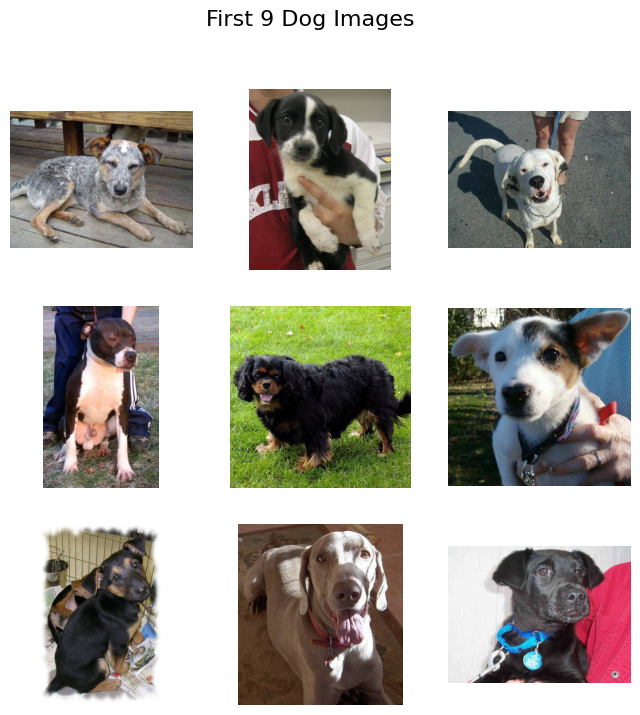

In [10]:
# Show first 9 dog images
show_images(dog_dir, "First 9 Dog Images")

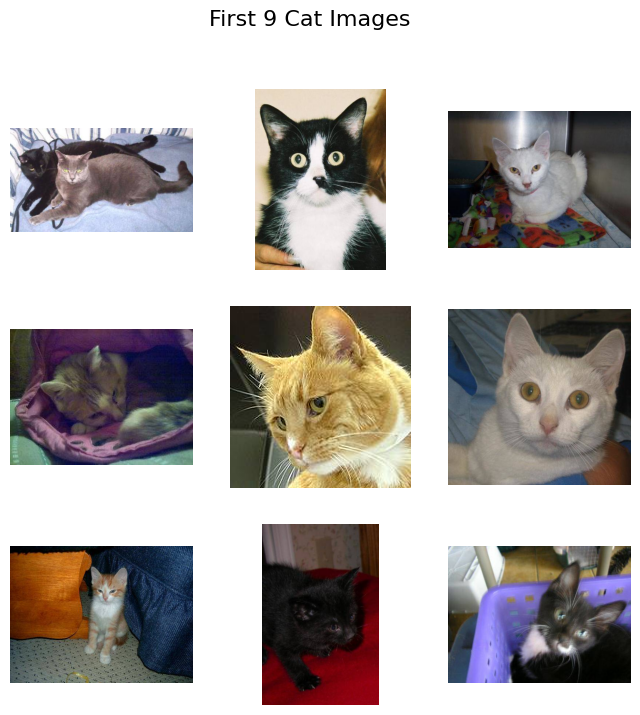

In [11]:
# Show first 9 cat images
show_images(cat_dir, "First 9 Cat Images")

## Image Preprocessing with ImageDataGenerator

In [17]:
# Base directories for training and testing datasets
train_dir = "/workspaces/josefina-aispuro-merelles-machine-learning/src/raw/train-data"
test_dir = "/workspaces/josefina-aispuro-merelles-machine-learning/src/raw/test-data"

In [18]:
# Define target image size
image_size = (200, 200)

In [19]:
# Create image generators for training and testing (normalize pixel values)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
# Load training images from directory
train_data = train_datagen.flow_from_directory(train_dir, target_size=image_size, class_mode="binary")

Found 20000 images belonging to 2 classes.


In [21]:
# Load testing images from directory
test_data = test_datagen.flow_from_directory(test_dir, target_size=image_size, class_mode="binary")

Found 5000 images belonging to 2 classes.


## CNN model

In [23]:
# Create a simple CNN model
model = Sequential()

In [26]:
# Adding layers
model.add(Conv2D(input_shape=(200, 200, 3), filters=32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [ ]:
# Dense Layers
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=2, activation="softmax"))